In [45]:
import numpy as np
import nutpie
import pandas as pd
from lifetimes import BetaGeoBetaBinomFitter

import pymc as pm
from pymc_marketing.clv import BetaGeoBetaBinomModel
from pymc_extras.prior import Prior

In [28]:
data = pd.read_csv("https://raw.githubusercontent.com/pymc-labs/pymc-marketing/main/data/bgbb_donations.csv") 
data.head()

In [57]:
model_config = {
    "alpha": Prior("HalfFlat"),
    "beta": Prior("HalfFlat"),
    "gamma": Prior("HalfFlat"),
    "delta": Prior("HalfFlat"),
}

model = BetaGeoBetaBinomModel(data=data,model_config=model_config)
model.build_model()
model

BG/BB
            alpha ~ HalfFlat()
             beta ~ HalfFlat()
            gamma ~ HalfFlat()
            delta ~ HalfFlat()
recency_frequency ~ BetaGeoBetaBinom(alpha, beta, gamma, delta, <constant>)

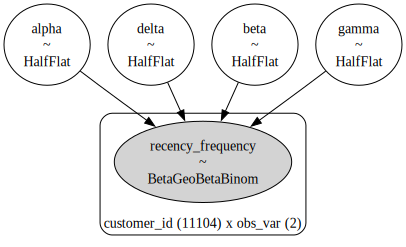

In [58]:
pm.model_to_graphviz(model.model)

In [59]:
model.fit(fit_method='map')

Output()

Inference data with groups:
	> posterior
	> observed_data
	> fit_data

In [60]:
model.fit_summary()

alpha    1.204
beta     0.750
delta    2.784
gamma    0.657
Name: value, dtype: float64

Compare to `lifetimes`

In [4]:
bgbb = BetaGeoBetaBinomFitter().fit(data['frequency'].values,
                             data['recency'].values,
                             data['T'].values
                                )
bgbb

<lifetimes.BetaGeoBetaBinomFitter: fitted with 22 subjects, alpha: 1.20, beta: 0.75, delta: 2.78, gamma: 0.66>

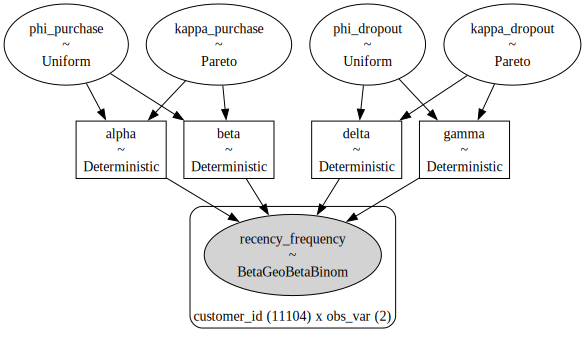

In [51]:
mcmc_model = BetaGeoBetaBinomModel(data=data)
mcmc_model.build_model()
pm.model_to_graphviz(mcmc_model.model)

In [72]:
with mcmc_model.model:
    prior_idata = pm.sample_prior_predictive()

Sampling: [kappa_dropout, kappa_purchase, phi_dropout, phi_purchase, recency_frequency]


In [73]:
prior_idata

Inference data with groups:
	> prior
	> prior_predictive
	> observed_data

`nutpie` is about 3x faster than defaults NUTS sampler in `pymc`

In [52]:
# add warning supress here
mcmc_model.fit(nuts_sampler="nutpie")

/Users/coltallen/miniconda3/envs/pymc-marketing-dev/lib/python3.10/site-packages/nutpie/compile_pymc.py:554: NumbaWarning: Cannot cache compiled function "numba_funcified_fgraph" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  return inner(x)
/Users/coltallen/miniconda3/envs/pymc-marketing-dev/lib/python3.10/site-packages/nutpie/compile_pymc.py:554: NumbaWarning: Cannot cache compiled function "scan" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  return inner(x)
/Users/coltallen/miniconda3/envs/pymc-marketing-dev/lib/python3.10/site-packages/nutpie/compile_pymc.py:554: NumbaWarning: Cannot cache compiled function "numba_funcified_fgraph" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  return inner(x)


Progress,Draws,Divergences,Step Size,Gradients/Draw
,2000,0,0.68,7
,2000,0,0.69,3
,2000,0,0.66,3
,2000,0,0.64,7


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> fit_data

Warmup iterations saved (warmup_*).